In [1]:
import pyarrow as pa
import pyarrow.parquet as pq
import pyarrow.compute as pc
import pyarrow.dataset as ds
import pandas as pd
import duckdb
import altair as alt
import json
from urllib.request import urlopen
import time
import os

# 读取文件

In [3]:
poet = pd.read_csv('../../CCGIV/datasets/WomenWriting/poet.csv')
poem = pd.read_csv('../../CCGIV/datasets/WomenWriting/poem.csv')
poempoetlinks = pd.read_csv('../../CCGIV/datasets/WomenWriting/poempoetlinks.csv')
subwork = pd.read_csv('../../CCGIV/datasets/WomenWriting/subwork.csv')
subworkpoemlinks = pd.read_csv('../../CCGIV/datasets/WomenWriting/subworkpoemlinks.csv')
subworkpoetlinks = pd.read_csv('../../CCGIV/datasets/WomenWriting/subworkpoetlinks.csv')
work = pd.read_csv('../../CCGIV/datasets/WomenWriting/work.csv')
workpoemlinks = pd.read_csv('../../CCGIV/datasets/WomenWriting/workpoemlinks.csv')
workpoetlinks = pd.read_csv('../../CCGIV/datasets/WomenWriting/workpoetlinks.csv')

In [4]:
# poet.to_parquet('poet.parquet')
# poem.to_parquet('poem.parquet')
# poempoetlinks.to_parquet('poempoetlinks.parquet')
# subwork.to_parquet('subwork.parquet')
# subworkpoemlinks.to_parquet('subworkpoemlinks.parquet')
# subworkpoetlinks.to_parquet('subworkpoetlinks.parquet')
# work.to_parquet('work.parquet')
# workpoemlinks.to_parquet('workpoemlinks.parquet')
# workpoetlinks.to_parquet('workpoetlinks.parquet')

In [5]:
con = duckdb.connect()
con.register('poet', poet)
con.register('poem', poem)
con.register('poempoetlinks', poempoetlinks)
con.register('subwork', subwork)
con.register('subworkpoemlinks', subworkpoemlinks)
con.register('subworkpoetlinks', subworkpoetlinks)
con.register('work', work)
con.register('workpoemlinks', workpoemlinks)
con.register('workpoetlinks', workpoetlinks)

# 全部Genre

In [6]:
peomGroupSQL = '''SELECT genreHZ, COUNT(*) AS num_poems FROM poem GROUP BY genreHZ ORDER BY num_poems DESC'''
groupedPeom = duckdb.query(peomGroupSQL).df()
groupedPeom

GenreHZ  num_poems
0        詩      58044
1        詞      11608
2     文﹕略傳       6490
3     None       4989
4     文﹕詩話       2840
5      文﹕文       1548
6     文﹕案語       1039
7      文﹕序        956
8     文﹕書信        702
9      文﹕跋        334
10    文﹕彈詞        328
11     文﹕記        316
12    文﹕題辭        286
13       圖        282
14   詩話，略傳        257
15     文﹕傳        253
16       曲        249
17    文﹕詞話        235
18     文﹕賦        186
19       文        175
20     文﹕論         88
21      對聯         81
22    文﹕自序         76
23     文﹕頌         70
24     文﹕識         59
25    文﹕評語         54
26    文﹕祭文         51
27     文﹕贊         49
28    文﹕上書         37
29     文﹕表         36
30   文﹕墓誌銘         36
31     文﹕詔         30
32     文﹕啟         30
33     文﹕誄         30
34     文﹕疏         27
35     文﹕銘         24
36    文﹕行狀         23
37  文﹕扉頁題辭         22
38    文﹕像贊         21
39     文﹕引         18
40    文﹕凡例         17
41      照片         17
42    文﹕附記         16
43    文﹕弁言         10
44     文﹕勑          9
45    文﹕璽書          7
46     文﹕令          7
47    文﹕自跋          6
48    文﹕輓詞          6
49     文：說          4
50     文﹕牋          4
51     文﹕奏          4
52     文﹕語          3
53   文﹕哀策文          2
54    文﹕年譜          2
55     文﹕策          1

In [7]:
peomGroupSQL = '''SELECT genrePY, COUNT(*) AS num_poems FROM poem GROUP BY genrePY ORDER BY num_poems DESC'''
groupedPeom = duckdb.query(peomGroupSQL).df()
groupedPeom
# Wen: lue zhuan 和 Wen: lüe zhuan其实是一类

GenrePY  num_poems
0                  shi      58044
1                   ci      11608
2                 None       4989
3       Wen: lue zhuan       3655
4         Wen: Shi hua       2840
5       Wen: lüe zhuan       2835
6             Wen: Wen       1548
7           Wen: An yu       1039
8              Wen: Xu        956
9         Wen: Shu xin        702
10             Wen: Ba        334
11         Wen: Tan ci        328
12             Wen: Ji        316
13          Wen: Ti ci        286
14                  tu        282
15  shi hua, lüe zhuan        257
16          Wen: Zhuan        253
17                  qu        249
18         Wen: Ci hua        235
19             Wen: Fu        186
20                 wen        175
21            Wen: Lun         88
22            dui lian         81
23          Wen: Zi xu         76
24           Wen: Song         70
25            Wen: Zhi         59
26        Wen: Ping yu         54
27         Wen: Ji wen         51
28            Wen: Zan         49
29      Wen: Shang shu         37
30           Wen: Biao         36
31    Wen: Mu zhi ming         36
32           Wen: Zhao         30
33             Wen: Qi         30
34            Wen: Lei         30
35            Wen: Shu         27
36           Wen: Ming         24
37    Wen: Xing zhuang         23
38   Wen: Fei ye ti ci         22
39      Wen: Xiang zan         21
40            Wen: Yin         18
41         Wen: Fan li         17
42            Zhaopian         17
43          Wen: Fu ji         16
44       Wen: Bian yan         10
45            Wen: Chi          9
46           Wen: Ling          7
47         Wen: Xi shu          7
48          Wen: Zi ba          6
49         Wen: Wan ci          6
50           Wen: Jian          4
51            Wen: Zou          4
52           Wen: Shuo          4
53             Wen: Yu          3
54        Wen: Nian pu          2
55      Wen: Ai ce wen          2
56             Wen: Ce          1

# 詞的二级分类（词牌名）

In [7]:
quryGenre = '''SELECT DISTINCT TitleHZ FROM poem WHERE GenreHZ='詞' '''
result = duckdb.query(quryGenre).df()
result

TitleHZ
0          長相思
1          臺城路
2          沁園春
3          調笑令
4          清平樂
...        ...
1501     柳梢青  
1502   減字木蘭花  
1503      城頭月 
1504      愁倚闌令
1505  西子妝和沈遠亭韻

[1506 rows x 1 columns]

In [8]:
quryGenre = '''SELECT DISTINCT 
        CASE 
            WHEN instr(TitleHZ, '前調') = 1 THEN substr(TitleHZ, instr(TitleHZ, '[') + 1, instr(TitleHZ, ']') - instr(TitleHZ, '[') - 1)
        ELSE TitleHZ
        END AS TitleHZ,COUNT(*) AS count
        FROM poem 
        WHERE GenreHZ='詞'
        GROUP BY TitleHZ
        HAVING count > 1
        ORDER BY count DESC'''
result = duckdb.query(quryGenre).df()
count_distribution = result['count'].value_counts(ascending=False)
# count_distribution
result

TitleHZ  count
0       菩薩蠻    424
1       浪淘沙    279
2       金縷曲    255
3       浣溪沙    239
4       如夢令    231
..      ...    ...
725     採桑子      2
726     秋思耗      2
727     開元樂      2
728     桂殿秌      2
729  又[夢江南]      2

[730 rows x 2 columns]

In [9]:
cipaiming = result['TitleHZ']

# 詩的二级分类（诗体）

In [10]:
quryGenre = '''SELECT DISTINCT Form FROM poem WHERE GenreHZ='詩' '''
result = duckdb.query(quryGenre).df()
result

Form
0   七言絕句
1   七言排律
2   七言律詩
3    四言詩
4   五言排律
5    三言詩
6   七言古詩
7     樂府
8    六言詩
9     騒體
10  五言律詩
11  五言絕句
12    其他
13  五言古詩
14  None
15  七言聯句
16  五言聯句
17    未定
18     偈
19   雜言詩

In [11]:
poemForms = result['Form']

# 曲的二级分类（曲排名）

In [12]:
quryGenre = '''SELECT DISTINCT TitleHZ FROM poem WHERE GenreHZ='曲' '''
result = duckdb.query(quryGenre).df()
result

TitleHZ
0     前腔[羅江怨]
1     前腔[綿搭絮]
2        南園林好
3     前腔[山坡羊]
4         懶畫眉
..        ...
163   鳩婦怨:啄木鸝
164        前調
165  自序一闋:小桃紅
166       禿嘶兒
167       勝葫蘆

[168 rows x 1 columns]

In [13]:
qupaiming = result['TitleHZ']

# 文的二级分类（文体）

In [14]:
quryGenre = '''SELECT DISTINCT GenreHZ
FROM poem
WHERE GenreHZ LIKE '文%' '''
result = duckdb.query(quryGenre).df()
result
# 文：說 - 文后面没有空格

GenreHZ
0      文﹕疏
1      文﹕啟
2      文﹕令
3     文﹕附記
4     文﹕像贊
5     文﹕彈詞
6      文﹕序
7     文﹕詩話
8      文﹕策
9      文﹕勑
10     文﹕誄
11     文﹕奏
12    文﹕書信
13    文﹕略傳
14   文﹕墓誌銘
15     文﹕頌
16     文﹕引
17   文﹕哀策文
18    文﹕年譜
19    文﹕弁言
20     文﹕文
21     文﹕賦
22       文
23     文﹕表
24    文﹕行狀
25     文﹕記
26    文﹕自跋
27    文﹕評語
28     文﹕跋
29    文﹕案語
30    文﹕輓詞
31     文﹕牋
32  文﹕扉頁題辭
33    文﹕題辭
34    文﹕上書
35     文﹕詔
36    文﹕璽書
37     文﹕贊
38    文﹕祭文
39    文﹕詞話
40     文：說
41    文﹕凡例
42     文﹕語
43     文﹕識
44    文﹕自序
45     文﹕傳
46     文﹕論
47     文﹕銘

In [15]:
wenForms = result['GenreHZ']

In [16]:
# quryGenre = '''SELECT DISTINCT
#   CASE
#     WHEN strpos(GenreHZ, '：') > 0 THEN substr(GenreHZ, strpos(GenreHZ, '：') + 1)
#     WHEN strpos(GenreHZ, '﹕') > 0 THEN substr(GenreHZ, strpos(GenreHZ, '﹕') + 1)
#     ELSE GenreHZ
#   END AS ExtractedGenre
# FROM poem
# WHERE GenreHZ LIKE '文%' '''
# result = duckdb.query(quryGenre).df()
# result

# 上面的32和42合并了

In [17]:
# wenForms = result['ExtractedGenre']

In [18]:
# 把文合为一类，有的既是诗话又是略传，但是其实都算是文
peomGroupSQL = '''SELECT
  CASE
    WHEN genreHZ LIKE '文%' THEN '文'
    ELSE genreHZ          
  END AS genre_group,
  COUNT(*) AS num_poems
FROM poem
GROUP BY genre_group
ORDER BY num_poems DESC'''
groupedPeom = duckdb.query(peomGroupSQL).df()
groupedPeom

genre_group  num_poems
0           詩      58044
1           文      16567
2           詞      11608
3        None       4989
4           圖        282
5       詩話，略傳        257
6           曲        249
7          對聯         81
8          照片         17

In [19]:
# 把 對聯 和 詩話，略傳 合并到文，把 圖 和 照片 合并
peomGroupSQL = '''SELECT
  CASE
    WHEN genreHZ LIKE '文%' OR genreHZ LIKE '%詩話%' OR genreHZ LIKE '%略傳%' OR genreHZ LIKE '%對聯%' THEN '文'
    WHEN genreHZ = '照片' OR genreHZ = '圖' THEN '圖'
    ELSE genreHZ          
  END AS genre_group,
  COUNT(*) AS num_poems
FROM poem
GROUP BY genre_group
ORDER BY num_poems DESC'''
groupedPeom = duckdb.query(peomGroupSQL).df()
groupedPeom

genre_group  num_poems
0           詩      58044
1           文      16905
2           詞      11608
3        None       4989
4           圖        299
5           曲        249

In [20]:
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram

In [21]:
data = {
    'Genre': groupedPeom['genre_group'],
    'Count': groupedPeom['num_poems']
}
data

{'Genre': 0       詩
 1       文
 2       詞
 3    None
 4       圖
 5       曲
 Name: genre_group, dtype: object,
 'Count': 0    58044
 1    16905
 2    11608
 3     4989
 4      299
 5      249
 Name: num_poems, dtype: int64}

# 把作品按以及分类（体裁）和二级分类标注

In [22]:
peomGroupSQL = '''SELECT poemID,
    genreHZ,
    CASE 
        WHEN genreHZ LIKE '詩' THEN '詩'
        WHEN genreHZ LIKE '文%' OR genreHZ LIKE '%詩話%' OR genreHZ LIKE '%略傳%' OR genreHZ LIKE '%對聯%' THEN '文'
        WHEN genreHZ LIKE '詞' THEN '詞'
        WHEN genreHZ IS NULL THEN 'None'
        WHEN genreHZ = '照片' OR genreHZ = '圖' THEN '圖'
        WHEN genreHZ LIKE '曲' THEN '曲'
        ELSE '其他'
    END AS Level1,
    CASE
        WHEN genreHZ LIKE '詩' AND Form IN (''' + ", ".join(f"'{form}'" for form in poemForms) + ''') 
            THEN Form 
        WHEN genreHZ LIKE '詞' AND TitleHZ IN (''' + ", ".join(f"'{title}'" for title in cipaiming) + ''') 
            THEN TitleHZ
        WHEN genreHZ LIKE '曲' AND TitleHZ IN (''' + ", ".join(f"'{form}'" for form in qupaiming) + ''') 
            THEN TitleHZ
        WHEN genreHZ LIKE '文%' AND GenreHZ IN (''' + ", ".join(f"'{form}'" for form in wenForms) + ''') 
            THEN GenreHZ
        ELSE 'None'
    END AS Level2
FROM
    poem
ORDER BY
    poemID;'''
groupedPeom = duckdb.query(peomGroupSQL).df()
groupedPeom

poemID GenreHZ Level1 Level2
0           6       詩      詩   五言律詩
1           7       詩      詩   七言絕句
2           8       詩      詩   七言絕句
3           9       詩      詩   五言古詩
4          10       詩      詩   七言絕句
...       ...     ...    ...    ...
92089   97303       詩      詩   五言絕句
92090   97304    文﹕案語      文   文﹕案語
92091   97305    None   None   None
92092   97306    None   None   None
92093   97307    None   None   None

[92094 rows x 4 columns]

In [23]:
result = {'name': 'flare', 'children': []}
for level1 in groupedPeom['Level1'].unique():
    level1_group = groupedPeom[groupedPeom['Level1'] == level1]
    level1_dict = {'name': level1, 'children': []}
    for level2 in level1_group['Level2'].unique():
        level2_group = level1_group[level1_group['Level2'] == level2]
        level2_dict = {'name': level2, 'children': [{'name': f'PoemID {pid}'} for pid in level2_group['poemID']]}
        level1_dict['children'].append(level2_dict)
    result['children'].append(level1_dict)

In [24]:
result

{'name': 'flare',
 'children': [{'name': '詩',
   'children': [{'name': '五言律詩',
     'children': [{'name': 'PoemID 6'},
      {'name': 'PoemID 15'},
      {'name': 'PoemID 20'},
      {'name': 'PoemID 27'},
      {'name': 'PoemID 37'},
      {'name': 'PoemID 38'},
      {'name': 'PoemID 43'},
      {'name': 'PoemID 46'},
      {'name': 'PoemID 48'},
      {'name': 'PoemID 52'},
      {'name': 'PoemID 53'},
      {'name': 'PoemID 64'},
      {'name': 'PoemID 68'},
      {'name': 'PoemID 77'},
      {'name': 'PoemID 78'},
      {'name': 'PoemID 81'},
      {'name': 'PoemID 84'},
      {'name': 'PoemID 86'},
      {'name': 'PoemID 87'},
      {'name': 'PoemID 89'},
      {'name': 'PoemID 93'},
      {'name': 'PoemID 97'},
      {'name': 'PoemID 101'},
      {'name': 'PoemID 107'},
      {'name': 'PoemID 108'},
      {'name': 'PoemID 110'},
      {'name': 'PoemID 112'},
      {'name': 'PoemID 120'},
      {'name': 'PoemID 123'},
      {'name': 'PoemID 130'},
      {'name': 'PoemID 134'},
  

In [25]:
import json


file_path = 'output.json'  
with open(file_path, 'w', encoding='utf-8') as file:
    json.dump(result, file, ensure_ascii=False, indent=2)

print(f"Data has been written to {file_path}")

Data has been written to output.json


In [26]:
level2_counts = groupedPeom.groupby(['Level1', 'Level2']).size().reset_index(name='count')

In [27]:
result1 = {'name': 'flare', 'children': []}
for level1, group in level2_counts.groupby('Level1'):
    level1_dict = {'name': level1, 'children': []}
    for idx, row in group.iterrows():
        level1_dict['children'].append({'name': row['Level2'], 'value': int(row['count'])})
    result1['children'].append(level1_dict)

import json
print(json.dumps(result1, indent=2))

{
  "name": "flare",
  "children": [
    {
      "name": "None",
      "children": [
        {
          "name": "None",
          "value": 4989
        }
      ]
    },
    {
      "name": "\u5716",
      "children": [
        {
          "name": "None",
          "value": 299
        }
      ]
    },
    {
      "name": "\u6587",
      "children": [
        {
          "name": "None",
          "value": 338
        },
        {
          "name": "\u6587",
          "value": 175
        },
        {
          "name": "\u6587\ufe55\u4e0a\u66f8",
          "value": 37
        },
        {
          "name": "\u6587\ufe55\u4ee4",
          "value": 7
        },
        {
          "name": "\u6587\ufe55\u50b3",
          "value": 253
        },
        {
          "name": "\u6587\ufe55\u50cf\u8d0a",
          "value": 21
        },
        {
          "name": "\u6587\ufe55\u51e1\u4f8b",
          "value": 17
        },
        {
          "name": "\u6587\ufe55\u52d1",
          "value": 9


In [28]:
# 写入 JSON 文件
with open('flare.json', 'w', encoding='utf-8') as file:
    json.dump(result1, file, ensure_ascii=False, indent=2)

print("JSON file has been saved.")

JSON file has been saved.


In [29]:
workpoetqury = '''SELECT DISTINCT role, COUNT(*) AS count
FROM workpoetlinks
GROUP BY role'''
poetrole = duckdb.query(workpoetqury).df()
poetrole

role  count
0    像贊作者      8
1     校註者      3
2    輓詞作者     94
3      題辭   1230
4     序作者    758
5    年譜作者      4
6    傳記作者    113
7     跋作者    214
8      作者    451
9      校閲     12
10   None      4
11   其他作者     44
12   附記作者     22
13   凡例作者      7
14  墓志詺作者     24
15     编輯     45
16   主要作者    413

In [30]:
workGroupSQL = '''SELECT workID, poetID 
                FROM workpoetlinks 
                WHERE role != '作者' AND role!= '主要作者' AND role != '其他作者'
                GROUP BY workID,poetID 
                ORDER BY workID'''
groupedwork = duckdb.query(workGroupSQL).df()
groupedwork

workID  poetID
0          9     486
1          9       5
2          9    1968
3          9    1951
4          9    1977
...      ...     ...
2412     480    8139
2413     480    8140
2414     481    8173
2415     482     456
2416     482    4673

[2417 rows x 2 columns]

In [31]:
workGroupSQL1 = '''SELECT 
    wpl.workID, 
    wpl.poetID, 
    poem_count_table.poem_count
FROM 
    workpoetlinks wpl
LEFT JOIN 
    (SELECT workID, COUNT(poemID) AS poem_count
     FROM workpoemlinks
     GROUP BY workID) AS poem_count_table
ON 
    wpl.workID = poem_count_table.workID
GROUP BY 
    wpl.workID, wpl.poetID, poem_count_table.poem_count
ORDER BY 
    wpl.workID'''
groupedwork1 = duckdb.query(workGroupSQL1).df()
groupedwork1

workID  poetID  poem_count
0          9    1968       986.0
1          9    1977       986.0
2          9     328       986.0
3          9    1951       986.0
4          9    4399       986.0
...      ...     ...         ...
3237     480    6081        82.0
3238     481    8173       885.0
3239     482     911       162.0
3240     482     456       162.0
3241     482    4673       162.0

[3242 rows x 3 columns]

In [32]:
groupedwork1['workID'] = groupedwork1['workID'].apply(lambda x: f'work_{x}')
groupedwork1['poetID'] = groupedwork1['poetID'].apply(lambda x: f'poet_{x}')

nodes = pd.DataFrame({
    'id': pd.concat([
        groupedwork1['workID'],
        groupedwork1['poetID']
    ]).unique()
    
})

groupedwork1['poem_count'] = groupedwork1['poem_count'].fillna(0)

# 在 merge 之前去除重复的 workID
unique_workIDs = groupedwork1[['workID', 'poem_count']].drop_duplicates(subset=['workID'])

# 进行合并，将 poem_count 添加到对应的 workID
nodes = nodes.merge(
    unique_workIDs.rename(columns={'workID': 'id'}),
    on='id', 
    how='left'
)
# 如果是 poet 节点，poem_count 默认为 0 或其他值
nodes['poem_count'] = nodes['poem_count'].fillna(0.5)



nodes['group'] = nodes['id'].apply(lambda x: 'Works' if x.startswith('work_') else 'Poets')


links = []
for index, row in groupedwork1.iterrows():
    links.append({'source': row['workID'], 'target': row['poetID']})

links_df = pd.DataFrame(links)
links_list = links_df.to_dict('records')

nodes_list = nodes.to_dict('records')

network_data1 = {
    'nodes': nodes_list,
    'links': links_list
}


with open('workpoempoetcount.json', 'w', encoding='utf-8') as file:
    json.dump(network_data1, file, ensure_ascii=False, indent=2)

print("JSON file has been saved.")

JSON file has been saved.


In [33]:
network_json1 = json.dumps(network_data1, indent=2)

with open('workpoempoetcount.json', 'w', encoding='utf-8') as f:
    f.write(network_json1)

print("JSON file has been saved.")

JSON file has been saved.


In [34]:
print(groupedwork.columns)

Index(['workID', 'poetID'], dtype='object')


In [35]:
groupedwork['workID'] = groupedwork['workID'].apply(lambda x: f'work_{x}')
groupedwork['poetID'] = groupedwork['poetID'].apply(lambda x: f'poet_{x}')

nodes = pd.DataFrame({
    'id': pd.concat([
        groupedwork['workID'],
        groupedwork['poetID']
    ]).unique()
})
nodes['group'] = nodes['id'].apply(lambda x: 'Works' if x.startswith('work_') else 'Poets')


links = []
for index, row in groupedwork.iterrows():
    links.append({'source': row['workID'], 'target': row['poetID'], 'value': 1})

links_df = pd.DataFrame(links)
links_list = links_df.to_dict('records')

nodes_list = nodes.to_dict('records')

network_data = {
    'nodes': nodes_list,
    'links': links_list
}


network_data

{'nodes': [{'id': 'work_9', 'group': 'Works'},
  {'id': 'work_10', 'group': 'Works'},
  {'id': 'work_11', 'group': 'Works'},
  {'id': 'work_12', 'group': 'Works'},
  {'id': 'work_13', 'group': 'Works'},
  {'id': 'work_14', 'group': 'Works'},
  {'id': 'work_15', 'group': 'Works'},
  {'id': 'work_16', 'group': 'Works'},
  {'id': 'work_17', 'group': 'Works'},
  {'id': 'work_18', 'group': 'Works'},
  {'id': 'work_19', 'group': 'Works'},
  {'id': 'work_20', 'group': 'Works'},
  {'id': 'work_21', 'group': 'Works'},
  {'id': 'work_22', 'group': 'Works'},
  {'id': 'work_23', 'group': 'Works'},
  {'id': 'work_24', 'group': 'Works'},
  {'id': 'work_25', 'group': 'Works'},
  {'id': 'work_26', 'group': 'Works'},
  {'id': 'work_28', 'group': 'Works'},
  {'id': 'work_29', 'group': 'Works'},
  {'id': 'work_30', 'group': 'Works'},
  {'id': 'work_31', 'group': 'Works'},
  {'id': 'work_32', 'group': 'Works'},
  {'id': 'work_33', 'group': 'Works'},
  {'id': 'work_34', 'group': 'Works'},
  {'id': 'work_35

In [36]:
# 使用 default 参数处理 int64 类型
with open('workpoetwithoutmain.json', 'w', encoding='utf-8') as file:
    json.dump(network_data, file, ensure_ascii=False, indent=2)

print("JSON file has been saved.")

JSON file has been saved.


In [37]:
workGroupSQL = '''SELECT workpoetlinks.poetID,workpoetlinks.workID,poet.StartYear 
                FROM workpoetlinks,poet
                WHERE workpoetlinks.poetID = poet.poetID AND role != '作者' AND role!= '主要作者' AND role != '其他作者'
                GROUP BY workpoetlinks.poetID,workpoetlinks.workID ,poet.StartYear 
                ORDER BY workpoetlinks.poetID'''

workgroup = duckdb.query(workGroupSQL).df()
workgroup

poetID  workID  StartYear
0          5       9       1743
1          6      11       1830
2         12      16       1814
3         16      20       1750
4         28      21       1736
...      ...     ...        ...
2412    8455     473       1740
2413    8456     473       1740
2414    8457     473       1740
2415    8458     473       1740
2416    8459     473       1740

[2417 rows x 3 columns]

In [38]:
from itertools import combinations
poet_start_year = workgroup.groupby('poetID')['StartYear'].min().reset_index()
# nodes = [{'id': str(pid), 'group': 1,} for pid in workgroup['poetID'].unique()]
nodes = [{'id': str(row['poetID']), 'group': 1, 'StartYear': str(row['StartYear'])} for _, row in poet_start_year.iterrows()]
nodes

[{'id': '5', 'group': 1, 'StartYear': '1743'},
 {'id': '6', 'group': 1, 'StartYear': '1830'},
 {'id': '12', 'group': 1, 'StartYear': '1814'},
 {'id': '16', 'group': 1, 'StartYear': '1750'},
 {'id': '28', 'group': 1, 'StartYear': '1736'},
 {'id': '32', 'group': 1, 'StartYear': '1821'},
 {'id': '43', 'group': 1, 'StartYear': '1592'},
 {'id': '63', 'group': 1, 'StartYear': '1662'},
 {'id': '72', 'group': 1, 'StartYear': '1728'},
 {'id': '92', 'group': 1, 'StartYear': '1764'},
 {'id': '106', 'group': 1, 'StartYear': '1756'},
 {'id': '108', 'group': 1, 'StartYear': '1766'},
 {'id': '118', 'group': 1, 'StartYear': '1800'},
 {'id': '124', 'group': 1, 'StartYear': '1796'},
 {'id': '126', 'group': 1, 'StartYear': '1797'},
 {'id': '127', 'group': 1, 'StartYear': '1793'},
 {'id': '132', 'group': 1, 'StartYear': '1796'},
 {'id': '145', 'group': 1, 'StartYear': '1800'},
 {'id': '146', 'group': 1, 'StartYear': '1774'},
 {'id': '147', 'group': 1, 'StartYear': '1801'},
 {'id': '154', 'group': 1, 'Star

In [39]:
# from itertools import combinations
# poet_start_year = workgroup.groupby('poetID')['StartYear'].min().reset_index()
# # nodes = [{'id': str(pid), 'group': 1,} for pid in workgroup['poetID'].unique()]
# nodes = [{'id': str(row['poetID']), 'group': 1, 'StartYear': row['StartYear']} for _, row in poet_start_year.iterrows()]


links = []
for work_id, group in workgroup.groupby('workID'):
    poets = group['poetID'].tolist()
    for (source, target) in combinations(poets, 2):
        links.append({'source': str(source), 'target': str(target), 'value': 1})

network_data = {
    'nodes': nodes,
    'links': links
}

print("Nodes:")
print(network_data['nodes'])
print("\nLinks:")
print(network_data['links'])

Nodes:
[{'id': '5', 'group': 1, 'StartYear': '1743'}, {'id': '6', 'group': 1, 'StartYear': '1830'}, {'id': '12', 'group': 1, 'StartYear': '1814'}, {'id': '16', 'group': 1, 'StartYear': '1750'}, {'id': '28', 'group': 1, 'StartYear': '1736'}, {'id': '32', 'group': 1, 'StartYear': '1821'}, {'id': '43', 'group': 1, 'StartYear': '1592'}, {'id': '63', 'group': 1, 'StartYear': '1662'}, {'id': '72', 'group': 1, 'StartYear': '1728'}, {'id': '92', 'group': 1, 'StartYear': '1764'}, {'id': '106', 'group': 1, 'StartYear': '1756'}, {'id': '108', 'group': 1, 'StartYear': '1766'}, {'id': '118', 'group': 1, 'StartYear': '1800'}, {'id': '124', 'group': 1, 'StartYear': '1796'}, {'id': '126', 'group': 1, 'StartYear': '1797'}, {'id': '127', 'group': 1, 'StartYear': '1793'}, {'id': '132', 'group': 1, 'StartYear': '1796'}, {'id': '145', 'group': 1, 'StartYear': '1800'}, {'id': '146', 'group': 1, 'StartYear': '1774'}, {'id': '147', 'group': 1, 'StartYear': '1801'}, {'id': '154', 'group': 1, 'StartYear': '1832

In [40]:
network_json = json.dumps(network_data, indent=2)

with open('network_data_withoutmain.json', 'w', encoding='utf-8') as f:
    f.write(network_json)

print("JSON file has been saved.")

JSON file has been saved.


In [41]:
# poem - poet - startYear - GenreHZ
quryGenreYear = '''SELECT poempoetlinks.poemID,poem.GenreHZ,poet.StartYear
                FROM poem,poempoetlinks,poet
                WHERE poem.poemID = poempoetlinks.poemID AND poempoetlinks.poetID = poet.poetID '''
GenreYear = duckdb.query(quryGenreYear).df()
GenreYear

poemID GenreHZ  StartYear
0           7       詩       1691
1           6       詩       1644
2           8       詩       1691
3           9       詩       1628
4          10       詩       1628
...       ...     ...        ...
88588   97301       詩       1766
88589   97302    文﹕案語       1880
88590   97303       詩       1766
88591   97304    文﹕案語       1880
88592   97257       詩       1766

[88593 rows x 3 columns]

In [42]:
quryGenreYear = '''SELECT poet.StartYear,poem.GenreHZ,COUNT(*) AS count
                FROM poem, poempoetlinks, poet
                WHERE poem.poemID = poempoetlinks.poemID AND poempoetlinks.poetID = poet.poetID
                GROUP BY poem.GenreHZ,poet.StartYear
                '''
GenreYear = duckdb.query(quryGenreYear).df()
GenreYear

StartYear GenreHZ  count
0          1662       詩    886
1          1610       詩    104
2          1614       詩    246
3          1668       詩     17
4          1667       詩     10
...         ...     ...    ...
1933       1859      對聯      1
1934       1881    文﹕自序      1
1935       1788     文﹕記      4
1936       1788     文﹕跋      7
1937       1880    文﹕凡例      1

[1938 rows x 3 columns]

In [43]:
genreYearSQL = '''SELECT poet.StartYear, poem.genreHZ,COUNT(*) AS count,
    CASE 
        WHEN genreHZ LIKE '詩' THEN '詩'
        WHEN genreHZ LIKE '文%' OR genreHZ LIKE '%詩話%' OR genreHZ LIKE '%略傳%' OR genreHZ LIKE '%對聯%' THEN '文'
        WHEN genreHZ LIKE '詞' THEN '詞'
        WHEN genreHZ IS NULL THEN 'None'
        WHEN genreHZ = '照片' OR genreHZ = '圖' THEN '圖'
        WHEN genreHZ LIKE '曲' THEN '曲'
        ELSE '其他'
    END AS Level1,
    CASE
        WHEN genreHZ LIKE '詩' AND Form IN (''' + ", ".join(f"'{form}'" for form in poemForms) + ''') 
            THEN Form 
        WHEN genreHZ LIKE '詞' AND TitleHZ IN (''' + ", ".join(f"'{title}'" for title in cipaiming) + ''') 
            THEN TitleHZ
        WHEN genreHZ LIKE '曲' AND TitleHZ IN (''' + ", ".join(f"'{form}'" for form in qupaiming) + ''') 
            THEN TitleHZ
        WHEN genreHZ LIKE '文%' AND GenreHZ IN (''' + ", ".join(f"'{form}'" for form in wenForms) + ''') 
            THEN GenreHZ
        ELSE 'None'
    END AS Level2
FROM poem, poempoetlinks, poet
WHERE poem.poemID = poempoetlinks.poemID AND poempoetlinks.poetID = poet.poetID
GROUP BY poet.StartYear, poem.genreHZ, Level1, Level2
ORDER BY count'''
genreYear = duckdb.query(genreYearSQL).df()
genreYear

StartYear GenreHZ  count Level1 Level2
0          1622       詩      1      詩     樂府
1          1721       詩      1      詩   七言絕句
2          1690       詩      1      詩   七言古詩
3          1715       詩      1      詩   七言律詩
4          1715       詩      1      詩   七言絕句
...         ...     ...    ...    ...    ...
8195       1644       詩   1331      詩   七言律詩
8196       1885    文﹕詩話   1409      文   文﹕詩話
8197       1644       詩   1515      詩   七言絕句
8198       1771    文﹕略傳   2046      文   文﹕略傳
8199          0       詩   2304      詩   七言絕句

[8200 rows x 5 columns]

In [44]:
poemYearSQL = '''SELECT StartYear,count, Level2
FROM genreYear
WHERE Level1 = '詩' AND StartYear>1367
ORDER BY StartYear;'''
poemYear = duckdb.query(poemYearSQL).df()
poemYear

StartYear  count Level2
0          1368      1     樂府
1          1368      2   五言律詩
2          1394      3   七言絕句
3          1415      5     騒體
4          1465      6   七言絕句
...         ...    ...    ...
1830       1901     31   五言絕句
1831       1901     68   七言絕句
1832       1904      1     樂府
1833       1910      1   七言律詩
1834       1910      1   七言古詩

[1835 rows x 3 columns]

In [45]:
pivot_df = poemYear.pivot_table(index='StartYear', columns='Level2', values='count', aggfunc='sum', fill_value=0)
pivot_df = pivot_df.reset_index()

pivot_df

Level2  StartYear  None  七言古詩  七言律詩  七言排律  七言絕句  七言聯句  三言詩  五言古詩  五言律詩  ...  \
0            1368     0     0     0     0     0     0    0     0     2  ...   
1            1394     0     0     0     0     3     0    0     0     0  ...   
2            1415     0     0     0     0     0     0    0     0     0  ...   
3            1465     0     0     0     0     6     0    0     0     0  ...   
4            1480     0     0     0     0     2     0    0     0     0  ...   
..            ...   ...   ...   ...   ...   ...   ...  ...   ...   ...  ...   
259          1898     0     0    29     0    39     0    0     1    13  ...   
260          1900     2    18    41     0    66     0    0    25    27  ...   
261          1901     0    24    15     1    68     0    0    20    20  ...   
262          1904     0     0     0     0     0     0    0     0     0  ...   
263          1910     0     1     1     0     0     0    0     0     0  ...   

Level2  五言絕句  五言聯句  偈  六言詩  其他  四言詩  未定  樂府  雜言詩  騒體  
0          0     0  0    0   0    0   0   1    0   0  
1          0     0  0    0   0    0   0   0    0   0  
2          0     0  0    0   0    0   0   0    0   5  
3          0     0  0    0   0    0   0   0    0   0  
4          0     0  0    0   0    0   0   0    0   0  
..       ...   ... ..  ...  ..  ...  ..  ..  ...  ..  
259       10     0  0    0   0    0   0   0    0   0  
260       14     0  0    0   0    0   0   8    0   0  
261       31     0  0    0   0    0   0   0    0   0  
262        0     0  0    0   0    0   0   1    0   0  
263        0     0  0    0   0    0   0   0    0   0  

[264 rows x 21 columns]

In [46]:
pivot_df.to_csv('genre_year_data.csv', index=False, encoding='utf-8-sig')
print("Data has been successfully saved to genre_year_data.csv")

Data has been successfully saved to genre_year_data.csv


In [47]:
ciYearSQL = '''SELECT Level2, StartYear,SUM(count) AS count, 
FROM genreYear
WHERE Level1 = '詞' AND StartYear>1367
GROUP BY StartYear, Level2
ORDER BY Level2,StartYear
'''
ciYear = duckdb.query(ciYearSQL).df()
ciYear

Level2  StartYear  count
0     (喝火令)       1843    1.0
1     (喝火令)       1845    1.0
2     (臨江仙)       1843    1.0
3     (臨江仙)       1845    1.0
4     (菩薩蠻)       1843    1.0
...     ...        ...    ...
4378    齊天樂       1860    2.0
4379    齊天樂       1873    1.0
4380    齊天樂       1878    2.0
4381    齊天樂       1883    2.0
4382    齊天樂       1885    2.0

[4383 rows x 3 columns]

In [48]:
import pandas as pd
import altair as alt

alt.data_transformers.enable('vegafusion')


line_chart = alt.Chart(ciYear).mark_line(point=True).encode(
    x='StartYear:Q',
    y='sum(count):Q',
    color='Level2:N',  # 使用不同颜色表示不同词牌名
    tooltip=['StartYear', 'sum(count)', 'Level2']
).properties(
    title="词牌名数量随时间的变化"
)

line_chart

KeyboardInterrupt: 

In [ ]:
ciYear_df = ciYear.pivot_table(index='StartYear', columns='Level2', values='count', aggfunc='sum',fill_value=0)
ciYear_df = ciYear_df.reset_index()

ciYear_df

# 點絳脣	點绛唇	點绛脣

In [ ]:
ciYear_df.to_csv('ci_year_data.csv', index=False, encoding='utf-8-sig')
print("Data has been successfully saved to ci_year_data.csv.csv")

In [ ]:
max_value = ciYear_df.drop(columns=['StartYear']).max().max()


In [ ]:
max_value

In [ ]:
max_value = pivot_df.drop(columns=['StartYear']).max().max()
max_value

In [ ]:
import pandas as pd
import altair as alt

alt.data_transformers.enable('vegafusion')


line_chart = alt.Chart(poemYear).mark_line(point=True).encode(
    x='StartYear:Q',
    y='sum(count):Q',
    color='Level2:N',  # 使用不同颜色表示不同词牌名
    tooltip=['StartYear', 'sum(count)', 'Level2']
).properties(
    title="诗体数量随时间的变化"
)

line_chart

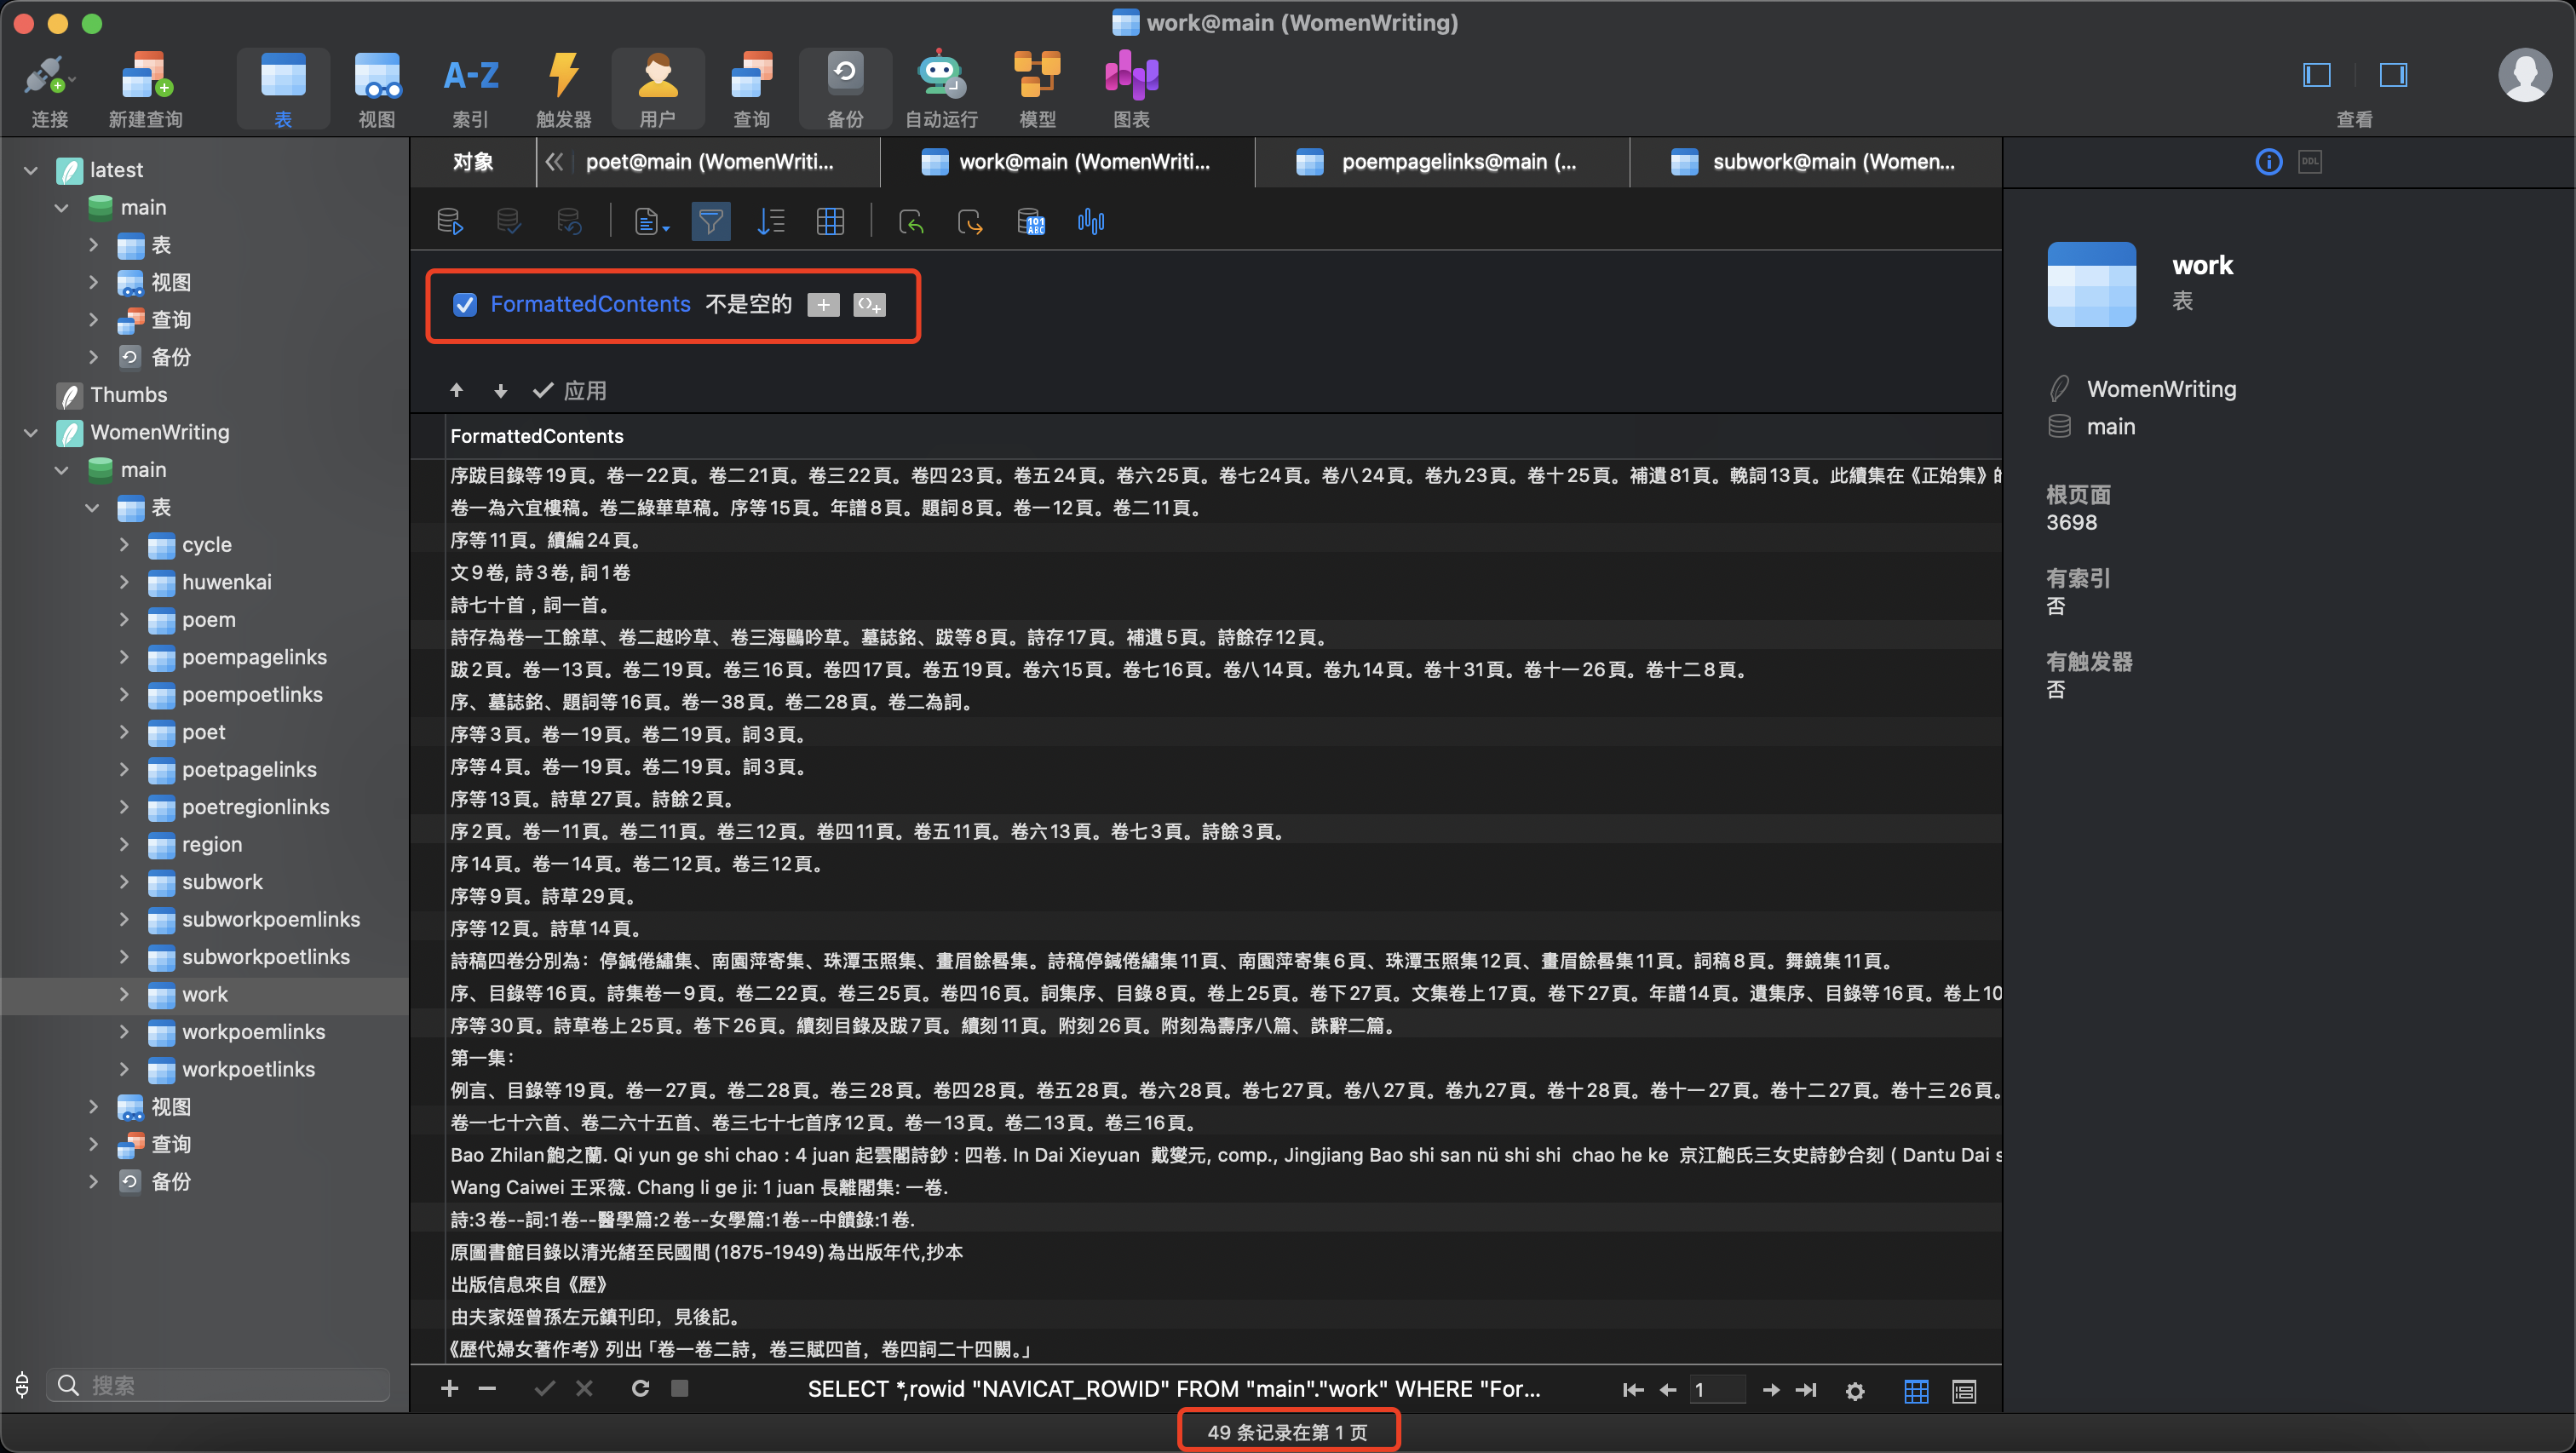

# 又有著作又写诗的作者？

In [ ]:
workpoempoetSQL = '''SELECT DISTINCT workpoetlinks.poetID
FROM workpoetlinks,poempoetlinks
WHERE workpoetlinks.poetID = poempoetlinks.poetID
'''
workpoempoet = duckdb.query(workpoempoetSQL).df()
workpoempoet

In [ ]:
poemselfwork = '''SELECT workpoetlinks.poetID, poempoetlinks.poemID, workpoetlinks.workID
FROM workpoetlinks
JOIN poempoetlinks ON workpoetlinks.poetID = poempoetlinks.poetID
JOIN workpoemlinks ON workpoetlinks.workID = workpoemlinks.workID
WHERE workpoemlinks.poemID = poempoetlinks.poemID;
'''
workpoempoet = duckdb.query(poemselfwork).df()
workpoempoet

In [ ]:
mainauthorSQL = '''SELECT workID
FROM workpoetlinks
WHERE role IN ('作者', '主要作者')
GROUP BY workID
HAVING COUNT(DISTINCT role) = 2
ORDER BY workID;'''
mainauthor = duckdb.query(mainauthorSQL).df()
mainauthor

In [ ]:
work22SQL = '''SELECT workpoetlinks.workID,work.TitleHZ,workpoetlinks.poetID,workpoetlinks.role,poet.NameHZ
            From workpoetlinks,poet,work
            Where workpoetlinks.poetID = poet.poetID AND workpoetlinks.workID = 22 AND workpoetlinks.workID = work.workID'''
work22 = duckdb.query(work22SQL).df()
work22

In [ ]:
mainauthorSQL = '''SELECT workID
FROM workpoetlinks
WHERE role IN ('编輯', '主要作者')
GROUP BY workID
HAVING COUNT(DISTINCT role) = 2
ORDER BY workID;'''
mainauthor = duckdb.query(mainauthorSQL).df()
mainauthor

In [ ]:
work40SQL = '''SELECT workpoetlinks.workID,work.TitleHZ,workpoetlinks.poetID,workpoetlinks.role,poet.NameHZ
            From workpoetlinks,poet,work
            Where workpoetlinks.poetID = poet.poetID AND workpoetlinks.workID = 40 AND workpoetlinks.workID = work.workID'''
work40 = duckdb.query(work40SQL).df()
work40

In [ ]:
work9SQL = '''SELECT workpoetlinks.workID,work.TitleHZ,workpoetlinks.poetID,workpoetlinks.role,poet.NameHZ
            From workpoetlinks,poet,work
            Where workpoetlinks.poetID = poet.poetID AND workpoetlinks.workID = 9 AND workpoetlinks.workID = work.workID'''
work9 = duckdb.query(work9SQL).df()
work9

In [ ]:
work125SQL = '''SELECT workpoetlinks.workID,work.TitleHZ,workpoetlinks.poetID,workpoetlinks.role,poet.NameHZ
            From workpoetlinks,poet,work
            Where workpoetlinks.poetID = poet.poetID AND workpoetlinks.workID = 125 AND workpoetlinks.workID = work.workID'''
work125 = duckdb.query(work125SQL).df()
work125

In [32]:
workcontainpoetSQL = '''SELECT workpoetlinks.workID, workpoetlinks.poetID, workpoetlinks.role
FROM workpoetlinks
WHERE workpoetlinks.workID = 15 AND workpoetlinks.poetID = 229;
            '''
workcontainpoet = duckdb.query(workcontainpoetSQL).df()
workcontainpoet

workID  poetID role
0      15     229   題辭

In [57]:
workcontainpoetSQL = '''SELECT workpoemlinks.workID,COUNT(workpoemlinks.poemID) as count,poempoetlinks.poetID
            From workpoemlinks,poempoetlinks,workpoetlinks
            Where workpoemlinks.poemID = poempoetlinks.poemID AND poempoetlinks.poetID = workpoetlinks.poetID
            GROUP BY workpoemlinks.workID,poempoetlinks.poetID
            '''
workcontainpoet = duckdb.query(workcontainpoetSQL).df()
workcontainpoet

workID  count  poetID
0         38     16     528
1         38     18      63
2         38     16      47
3         38      6      88
4         38      8      71
...      ...    ...     ...
4050     459     17    1288
4051     475      1    8432
4052     473      1    8455
4053     481     10     110
4054     481      7    1895

[4055 rows x 3 columns]

In [68]:
workcontainpoetSQL1 = '''
SELECT workcontainpoet.workID,
       workcontainpoet.count,
       workcontainpoet.poetID
FROM workcontainpoet
JOIN workpoetlinks ON workcontainpoet.workID = workpoetlinks.workID 
                   AND workcontainpoet.poetID = workpoetlinks.poetID
WHERE workpoetlinks.role = '主要作者' OR workpoetlinks.role = '作者' OR workpoetlinks.role = '其他作者'
'''
workcontainpoet1 = duckdb.query(workcontainpoetSQL1).df()
workcontainpoet1

workID  count  poetID
0        15    104      11
1        21     24      26
2        22      1    2018
3        21     84    1380
4        21     27      22
..      ...    ...     ...
889     479     66    7860
890      61     94     158
891     268    111      12
892     177      4    6344
893     443      6    6435

[894 rows x 3 columns]

In [69]:
temp = workcontainpoet1[workcontainpoet1['workID'] == 21]
temp

workID  count  poetID
1        21     24      26
3        21     84    1380
4        21     27      22
178      21     12      20
528      21    162      90
529      21     73      27
532      21     19      19
626      21    237      24
691      21    128      88
797      21    120     112

In [70]:
source = pd.DataFrame({"category": temp['poetID'].astype(str), "value": temp['count']})
source

category  value
1         26     24
3       1380     84
4         22     27
178       20     12
528       90    162
529       27     73
532       19     19
626       24    237
691       88    128
797      112    120

In [71]:
alt.Chart(source).mark_arc().encode(
    theta="value",
    color="category"
)

alt.Chart(...)

In [72]:
temp1 = workcontainpoet1[workcontainpoet1['workID'] == 15]
source = pd.DataFrame({"category": temp1['poetID'].astype(str), "value": temp1['count']})
alt.Chart(source).mark_arc().encode(
    theta="value",
    color="category"
)

alt.Chart(...)

In [73]:
workGroupWithPieSQL = '''SELECT workID, poetID 
                FROM workpoetlinks 
                WHERE role != '作者' AND role!= '主要作者' AND role != '其他作者'
                GROUP BY workID,poetID 
                ORDER BY workID'''
workGroupWithPie = duckdb.query(workGroupWithPieSQL).df()
workGroupWithPie

workID  poetID
0          9     328
1          9     486
2          9       5
3          9    4399
4          9    1968
...      ...     ...
2412     480    8137
2413     480    8141
2414     481    8173
2415     482     456
2416     482    4673

[2417 rows x 2 columns]

In [74]:
workGroupWithPie['workID'] = workGroupWithPie['workID'].apply(lambda x: f'work_{x}')
workGroupWithPie['poetID'] = workGroupWithPie['poetID'].apply(lambda x: f'poet_{x}')

nodes = pd.DataFrame({
    'id': pd.concat([
        workGroupWithPie['workID'],
        workGroupWithPie['poetID']
    ]).unique()
})
nodes['group'] = nodes['id'].apply(lambda x: 'Works' if x.startswith('work_') else 'Poets')


links = []
for index, row in workGroupWithPie.iterrows():
    links.append({'source': row['workID'], 'target': row['poetID'], 'value': 1})

links_df = pd.DataFrame(links)
links_list = links_df.to_dict('records')

nodes_list = nodes.to_dict('records')

network_data = {
    'nodes': nodes_list,
    'links': links_list
}


network_data

{'nodes': [{'id': 'work_9', 'group': 'Works'},
  {'id': 'work_10', 'group': 'Works'},
  {'id': 'work_11', 'group': 'Works'},
  {'id': 'work_12', 'group': 'Works'},
  {'id': 'work_13', 'group': 'Works'},
  {'id': 'work_14', 'group': 'Works'},
  {'id': 'work_15', 'group': 'Works'},
  {'id': 'work_16', 'group': 'Works'},
  {'id': 'work_17', 'group': 'Works'},
  {'id': 'work_18', 'group': 'Works'},
  {'id': 'work_19', 'group': 'Works'},
  {'id': 'work_20', 'group': 'Works'},
  {'id': 'work_21', 'group': 'Works'},
  {'id': 'work_22', 'group': 'Works'},
  {'id': 'work_23', 'group': 'Works'},
  {'id': 'work_24', 'group': 'Works'},
  {'id': 'work_25', 'group': 'Works'},
  {'id': 'work_26', 'group': 'Works'},
  {'id': 'work_28', 'group': 'Works'},
  {'id': 'work_29', 'group': 'Works'},
  {'id': 'work_30', 'group': 'Works'},
  {'id': 'work_31', 'group': 'Works'},
  {'id': 'work_32', 'group': 'Works'},
  {'id': 'work_33', 'group': 'Works'},
  {'id': 'work_34', 'group': 'Works'},
  {'id': 'work_35

# 关于Work与poet
work是poem的合集，一个work可以有多个poet，各个poet都有role，所有的role种类见下

In [75]:
workpoetqury = '''SELECT DISTINCT role, COUNT(*) AS count
                FROM workpoetlinks
                GROUP BY role'''
poetrole = duckdb.query(workpoetqury).df()
poetrole

role  count
0      编輯     45
1    主要作者    413
2   墓志詺作者     24
3      校閲     12
4    None      4
5      作者    451
6    像贊作者      8
7      題辭   1230
8     序作者    758
9    輓詞作者     94
10    校註者      3
11   附記作者     22
12   凡例作者      7
13   其他作者     44
14    跋作者    214
15   年譜作者      4
16   傳記作者    113

## 释义
* **像贊：**自古像赞，一般配置在各姓氏宗谱的先公遗像后面。撰写像赞者，**大都是当代或后世的名人、学者**。像赞主要依据题词者本人的思想、立场而定，并不一定都能做到遣词公允、恰如其分。但有一点是可以肯定的，在字里行间中都会充满敬仰和崇敬之情。
* **凡例：**凡例，指书前关于本书体例的说明。志是官修的书，一旦负责编纂，先得对该地域地情有大致的了解，然后制订“凡例”，说明这本书的**著作内容和编纂体例**，通常谓之发凡起例。书前关于本书体例的说明。凡例又称谱例，主要阐明族谱的纂修原则和体例。凡例是新编地方志必须要有的。所谓凡例，就是发凡起例。地方志的凡例是对志书的宗旨、内容、体裁、结构以及编写中一些基本问题的规定或说明。简言之，就是说明志书的宗旨、内容和编纂体例的文字。再通俗一点，就像我国著名语言学家王力先生所说：“**凡例是作者认为应该注意的地方。**”
* **年譜：**按年月记载某人生平事迹的著作，用编年体裁记载个人生平事迹的著作。大多是后人就其著述及史籍所载事实考订编次而成
* **傳記：**传记，文体名。亦单称传。是一种常见的文学形式。主要记述人物的生平事迹，根据各种书面的、口述的回忆、调查等相关材料，加以选择性的编排、描写与说明而成。传记和历史关系密切，某些写作年代久远的传记常被人们当史料看待。一般由他人记述，亦有自述生平者，称"自传"。传记大体分两大类：一类是以记述翔实史事为主的史传或一般纪传文字；另一类属文学范围，传记作者在记述传主事迹过程中，可能会渗透自己的某些情感、想象或者推断，但和小说不同，传记一般不虚构，纪实性是传记的基本要求。

主要作者是work中大部份poem的poet，其余poem的poet都算做作者、其他作者。有时候，是在poet去世后，有其他人搜集了若干poem，加上了序和跋，组成work，也有的是poet给自己的poem集合写序。主要作者、作者和其他作者是work中收录作品的作者。可以统计，每个work中的poet数量和每个poet在这个work中收录作品的数量

In [83]:
workcontainpoetSQL = '''SELECT workpoemlinks.workID,COUNT(workpoemlinks.poemID) as count,poempoetlinks.poetID
            From workpoemlinks,poempoetlinks,workpoetlinks
            Where workpoemlinks.poemID = poempoetlinks.poemID AND poempoetlinks.poetID = workpoetlinks.poetID
            GROUP BY workpoemlinks.workID,poempoetlinks.poetID
            '''
workcontainpoet = duckdb.query(workcontainpoetSQL).df()
workcontainpoetSQL1 = '''
SELECT workcontainpoet.workID,
       workcontainpoet.count,
       workcontainpoet.poetID,
       workpoetlinks.role
FROM workcontainpoet
JOIN workpoetlinks ON workcontainpoet.workID = workpoetlinks.workID 
                   AND workcontainpoet.poetID = workpoetlinks.poetID
WHERE workpoetlinks.role = '主要作者' OR workpoetlinks.role = '作者' OR workpoetlinks.role = '其他作者'
'''
workcontainpoet1 = duckdb.query(workcontainpoetSQL1).df()
workcontainpoet1

workID  count  poetID  role
0        35    231     104    作者
1       170   2496     106  主要作者
2        20     35      13    作者
3        61     28     216    作者
4        61     27      90    作者
..      ...    ...     ...   ...
889     479     66    7860  主要作者
890      61     94     158    作者
891     326     77    4065  主要作者
892     177      4    6344    作者
893     443      6    6435    作者

[894 rows x 4 columns]

In [84]:
temp = workcontainpoet1[workcontainpoet1['workID'] == 21]
temp

workID  count  poetID role
174      21     24      26   作者
176      21     84    1380   作者
177      21     27      22   作者
259      21    162      90   作者
260      21     73      27   作者
263      21     19      19   作者
396      21    120     112   作者
460      21    128      88   作者
555      21    237      24   作者
713      21     12      20   作者

In [85]:
source = pd.DataFrame({"category": temp['poetID'].astype(str), "value": temp['count']})
alt.Chart(source).mark_arc().encode(
    theta="value",
    color="category"
)

alt.Chart(...)

一个work包含的其余role数量可以反应信息：给这个work写序写跋写题辞的人越多，这个作品更受认可？

In [86]:
workGroupSQL = '''SELECT workID, poetID,role
                FROM workpoetlinks 
                WHERE role != '作者' AND role!= '主要作者' AND role != '其他作者'
                GROUP BY workID,poetID,role
                ORDER BY workID'''
groupedwork = duckdb.query(workGroupSQL).df()
groupedwork

workID  poetID   role
0          9     328     校閲
1          9       5    序作者
2          9    1968    序作者
3          9     328    跋作者
4          9    1951  墓志詺作者
...      ...     ...    ...
2529     480    8138    序作者
2530     481    8173    校註者
2531     482    4673     題辭
2532     482     456   附記作者
2533     482     456    序作者

[2534 rows x 3 columns]

In [87]:
groupedwork['workID'] = groupedwork['workID'].apply(lambda x: f'work_{x}')
groupedwork['poetID'] = groupedwork['poetID'].apply(lambda x: f'poet_{x}')

nodes = pd.DataFrame({
    'id': pd.concat([
        groupedwork['workID'],
        groupedwork['poetID']
    ]).unique()
})
nodes['group'] = nodes['id'].apply(lambda x: 'Works' if x.startswith('work_') else 'Poets')


links = []
for index, row in groupedwork.iterrows():
    links.append({'source': row['workID'], 'target': row['poetID'], 'value': 1})

links_df = pd.DataFrame(links)
links_list = links_df.to_dict('records')

nodes_list = nodes.to_dict('records')

network_data = {
    'nodes': nodes_list,
    'links': links_list
}


network_data

{'nodes': [{'id': 'work_9', 'group': 'Works'},
  {'id': 'work_10', 'group': 'Works'},
  {'id': 'work_11', 'group': 'Works'},
  {'id': 'work_12', 'group': 'Works'},
  {'id': 'work_13', 'group': 'Works'},
  {'id': 'work_14', 'group': 'Works'},
  {'id': 'work_15', 'group': 'Works'},
  {'id': 'work_16', 'group': 'Works'},
  {'id': 'work_17', 'group': 'Works'},
  {'id': 'work_18', 'group': 'Works'},
  {'id': 'work_19', 'group': 'Works'},
  {'id': 'work_20', 'group': 'Works'},
  {'id': 'work_21', 'group': 'Works'},
  {'id': 'work_22', 'group': 'Works'},
  {'id': 'work_23', 'group': 'Works'},
  {'id': 'work_24', 'group': 'Works'},
  {'id': 'work_25', 'group': 'Works'},
  {'id': 'work_26', 'group': 'Works'},
  {'id': 'work_28', 'group': 'Works'},
  {'id': 'work_29', 'group': 'Works'},
  {'id': 'work_30', 'group': 'Works'},
  {'id': 'work_31', 'group': 'Works'},
  {'id': 'work_32', 'group': 'Works'},
  {'id': 'work_33', 'group': 'Works'},
  {'id': 'work_34', 'group': 'Works'},
  {'id': 'work_35

结果：
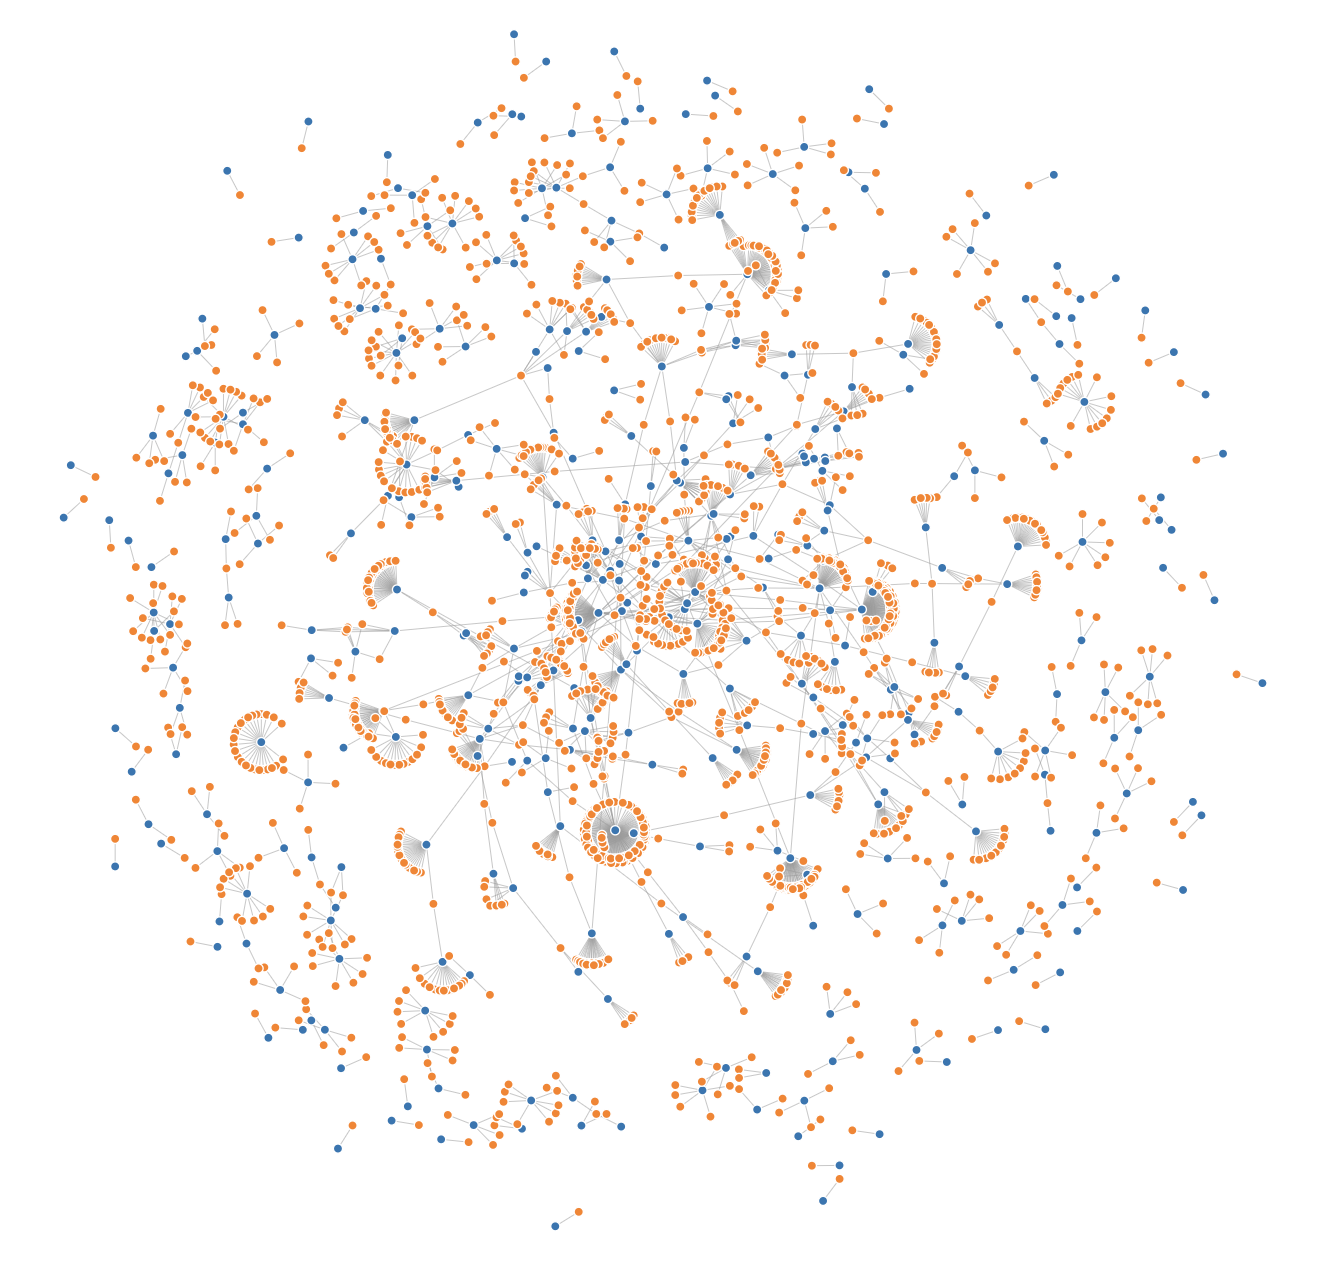

poet之间的合著关系网络

In [89]:
workGroupSQL = '''SELECT workpoetlinks.poetID,workpoetlinks.workID,poet.StartYear 
                FROM workpoetlinks,poet
                WHERE workpoetlinks.poetID = poet.poetID AND role != '作者' AND role!= '主要作者' AND role != '其他作者'
                GROUP BY workpoetlinks.poetID,workpoetlinks.workID ,poet.StartYear 
                ORDER BY workpoetlinks.poetID'''

workgroup = duckdb.query(workGroupSQL).df()
workgroup

poetID  workID  StartYear
0          5       9       1743
1          6      11       1830
2         12      16       1814
3         16      20       1750
4         28      21       1736
...      ...     ...        ...
2412    8455     473       1740
2413    8456     473       1740
2414    8457     473       1740
2415    8458     473       1740
2416    8459     473       1740

[2417 rows x 3 columns]

In [90]:
from itertools import combinations
poet_start_year = workgroup.groupby('poetID')['StartYear'].min().reset_index()
# nodes = [{'id': str(pid), 'group': 1,} for pid in workgroup['poetID'].unique()]
nodes = [{'id': str(row['poetID']), 'group': 1, 'StartYear': str(row['StartYear'])} for _, row in poet_start_year.iterrows()]
nodes

[{'id': '5', 'group': 1, 'StartYear': '1743'},
 {'id': '6', 'group': 1, 'StartYear': '1830'},
 {'id': '12', 'group': 1, 'StartYear': '1814'},
 {'id': '16', 'group': 1, 'StartYear': '1750'},
 {'id': '28', 'group': 1, 'StartYear': '1736'},
 {'id': '32', 'group': 1, 'StartYear': '1821'},
 {'id': '43', 'group': 1, 'StartYear': '1592'},
 {'id': '63', 'group': 1, 'StartYear': '1662'},
 {'id': '72', 'group': 1, 'StartYear': '1728'},
 {'id': '92', 'group': 1, 'StartYear': '1764'},
 {'id': '106', 'group': 1, 'StartYear': '1756'},
 {'id': '108', 'group': 1, 'StartYear': '1766'},
 {'id': '118', 'group': 1, 'StartYear': '1800'},
 {'id': '124', 'group': 1, 'StartYear': '1796'},
 {'id': '126', 'group': 1, 'StartYear': '1797'},
 {'id': '127', 'group': 1, 'StartYear': '1793'},
 {'id': '132', 'group': 1, 'StartYear': '1796'},
 {'id': '145', 'group': 1, 'StartYear': '1800'},
 {'id': '146', 'group': 1, 'StartYear': '1774'},
 {'id': '147', 'group': 1, 'StartYear': '1801'},
 {'id': '154', 'group': 1, 'Star

In [91]:
links = []
for work_id, group in workgroup.groupby('workID'):
    poets = group['poetID'].tolist()
    for (source, target) in combinations(poets, 2):
        links.append({'source': str(source), 'target': str(target), 'value': 1})

network_data = {
    'nodes': nodes,
    'links': links
}

network_data

{'nodes': [{'id': '5', 'group': 1, 'StartYear': '1743'},
  {'id': '6', 'group': 1, 'StartYear': '1830'},
  {'id': '12', 'group': 1, 'StartYear': '1814'},
  {'id': '16', 'group': 1, 'StartYear': '1750'},
  {'id': '28', 'group': 1, 'StartYear': '1736'},
  {'id': '32', 'group': 1, 'StartYear': '1821'},
  {'id': '43', 'group': 1, 'StartYear': '1592'},
  {'id': '63', 'group': 1, 'StartYear': '1662'},
  {'id': '72', 'group': 1, 'StartYear': '1728'},
  {'id': '92', 'group': 1, 'StartYear': '1764'},
  {'id': '106', 'group': 1, 'StartYear': '1756'},
  {'id': '108', 'group': 1, 'StartYear': '1766'},
  {'id': '118', 'group': 1, 'StartYear': '1800'},
  {'id': '124', 'group': 1, 'StartYear': '1796'},
  {'id': '126', 'group': 1, 'StartYear': '1797'},
  {'id': '127', 'group': 1, 'StartYear': '1793'},
  {'id': '132', 'group': 1, 'StartYear': '1796'},
  {'id': '145', 'group': 1, 'StartYear': '1800'},
  {'id': '146', 'group': 1, 'StartYear': '1774'},
  {'id': '147', 'group': 1, 'StartYear': '1801'},
  {

结果：
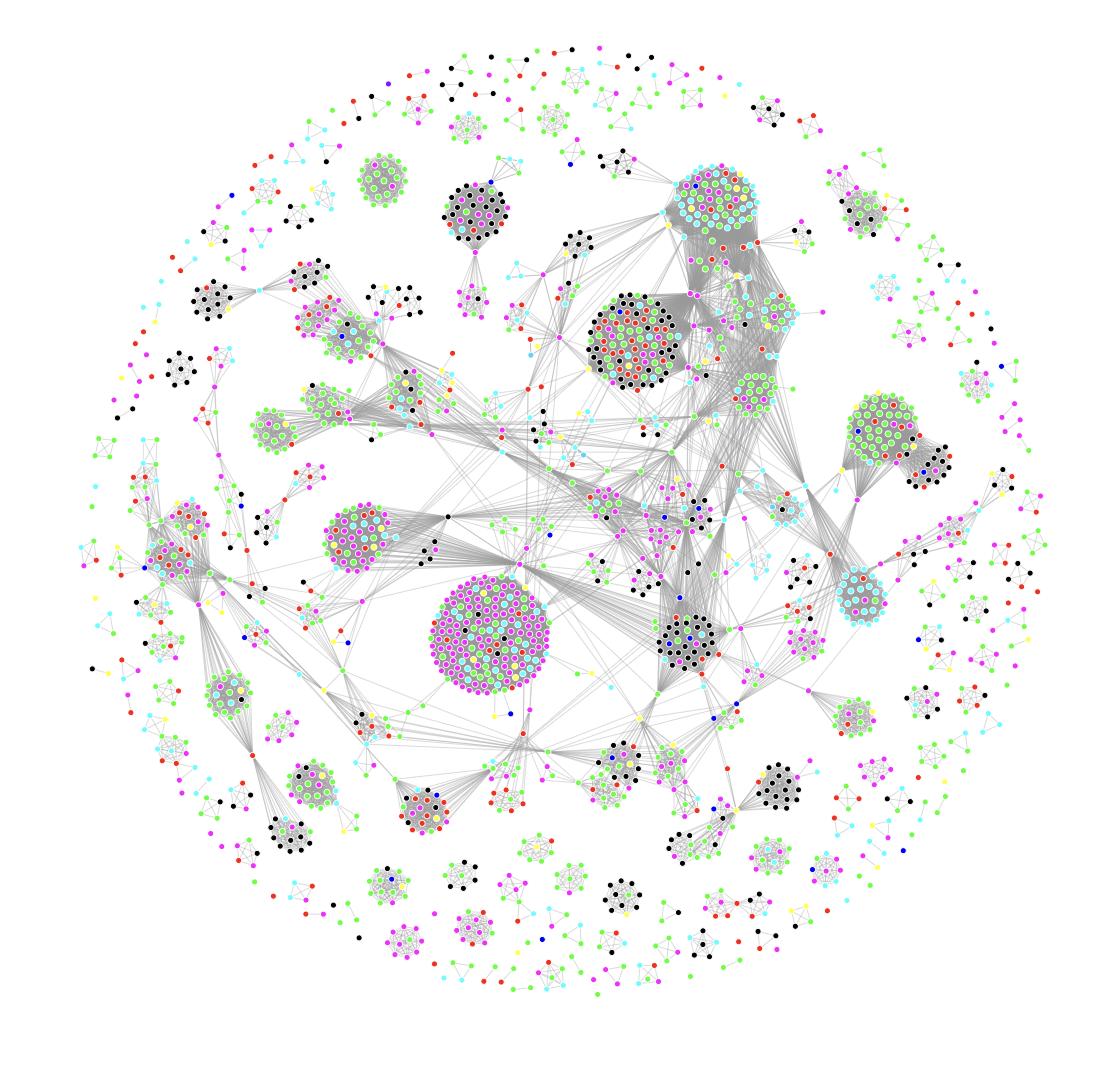

构想：把饼图作为网络图中work的结点，示例（图中饼图为假数据）
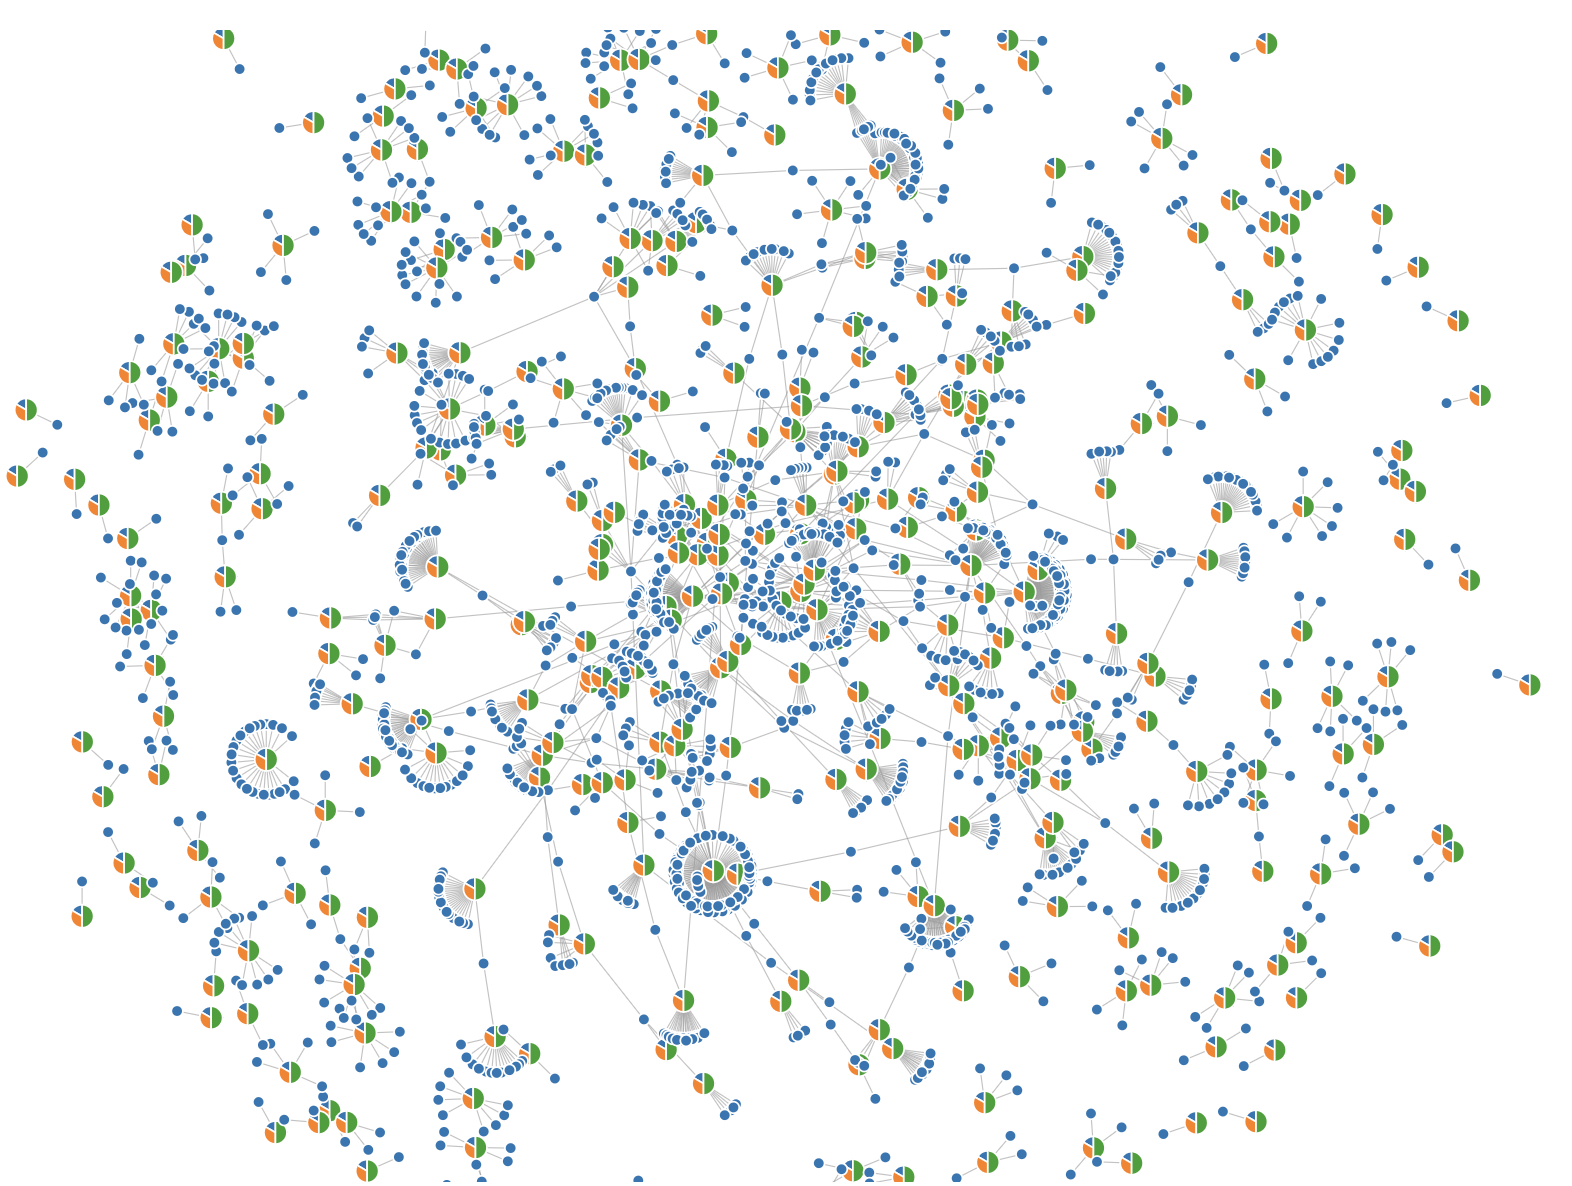

# 一个品被多个集收录？

In [100]:
poemWorkGroupSQL = '''SELECT poemID, COUNT(DISTINCT workID) AS count
    FROM workpoemlinks
    GROUP BY poemID
    ORDER BY count DESC'''

poemWorkGroup = duckdb.query(poemWorkGroupSQL).df()
poemWorkGroup

poemID  count
0          37      1
1          54      1
2         135      1
3         172      1
4         205      1
...       ...    ...
91868   96843      1
91869   96935      1
91870   96942      1
91871   97073      1
91872   97267      1

[91873 rows x 2 columns]

In [101]:
poetWorkGroupSQL = '''SELECT poetID, COUNT(DISTINCT workID) AS count
    FROM workpoetlinks
    GROUP BY poetID
    ORDER BY count DESC'''

poetWorkGroup = duckdb.query(poetWorkGroupSQL).df()
poetWorkGroup

poetID  count
0        263     13
1        199      9
2        308      9
3         92      7
4        202      7
...      ...    ...
2765    6143      1
2766    8286      1
2767    8309      1
2768    7437      1
2769    8408      1

[2770 rows x 2 columns]

In [104]:
poetWorkGroupSQL = '''SELECT poetID, COUNT(DISTINCT workID) AS count
    FROM workpoetlinks
    WHERE role = '主要作者' OR role = '作者' OR role = '其他作者'
    GROUP BY poetID
    ORDER BY count DESC'''

poetWorkGroup = duckdb.query(poetWorkGroupSQL).df()
poetWorkGroup

poetID  count
0       202      6
1       199      4
2       911      4
3       213      4
4       165      4
..      ...    ...
770     524      1
771    8048      1
772    8118      1
773    6287      1
774    6360      1

[775 rows x 2 columns]

In [102]:
poetWorkGroupSQL = '''SELECT poetID, COUNT(DISTINCT workID) AS count
    FROM workpoetlinks
    WHERE role = '像贊作者'
    GROUP BY poetID
    ORDER BY count DESC'''

poetWorkGroup = duckdb.query(poetWorkGroupSQL).df()
poetWorkGroup

poetID  count
0    6430      1
1    6494      1
2     410      1
3    7759      1
4    7006      1
5    6050      1
6    1977      1
7    7279      1

In [103]:
poetWorkGroupSQL = '''SELECT poetID, COUNT(DISTINCT workID) AS count
    FROM workpoetlinks
    WHERE role = '主要作者'
    GROUP BY poetID
    ORDER BY count DESC'''

poetWorkGroup = duckdb.query(poetWorkGroupSQL).df()
poetWorkGroup

poetID  count
0      3847      4
1       911      4
2       106      3
3       213      3
4      5584      3
..      ...    ...
368    3755      1
369    1933      1
370     247      1
371    5826      1
372    7500      1

[373 rows x 2 columns]

# 判定凡例作者作为编辑作者
除了作者6765只做为对应作品的凡例作者，其余凡例作者都在作品中同时担任编辑、序作者等角色

In [112]:
poetWorkGroupSQL = '''SELECT w.workID, w.poetID, w.role
FROM workpoetlinks w
JOIN (
    SELECT poetID, workID
    FROM workpoetlinks
    WHERE role = '凡例作者'
) AS subquery
ON w.poetID = subquery.poetID AND w.workID = subquery.workID
ORDER BY w.workID
    '''

poetWorkGroup = duckdb.query(poetWorkGroupSQL).df()
poetWorkGroup

workID  poetID  role
0       17     474    编輯
1       17     474   序作者
2       17     474  凡例作者
3       18     480    编輯
4       18     480   序作者
5       18     480  凡例作者
6       19     268    编輯
7       19     268  凡例作者
8       38     274    编輯
9       38     274   序作者
10      38     274  凡例作者
11      63     306    编輯
12      63     306  凡例作者
13     169    6438   序作者
14     169    6438  凡例作者
15     206    6765  凡例作者

In [113]:
poetWorkGroupSQL = '''SELECT w.workID, w.poetID, w.role
FROM workpoetlinks w
JOIN (
    SELECT poetID, workID
    FROM workpoetlinks
    WHERE role = '年譜作者'
) AS subquery
ON w.poetID = subquery.poetID AND w.workID = subquery.workID
ORDER BY w.workID
'''

poetWorkGroup = duckdb.query(poetWorkGroupSQL).df()
poetWorkGroup

workID  poetID  role
0      40     308  年譜作者
1      58     431  年譜作者
2      58     432  年譜作者
3      58     433  年譜作者

# 輓詞作者

In [121]:
poetWorkGroupSQL = '''SELECT w.workID, w.poetID, w.role
FROM workpoetlinks w
JOIN (
    SELECT poetID, workID
    FROM workpoetlinks
    WHERE role = '輓詞作者'
) AS subquery
ON w.poetID = subquery.poetID AND w.workID = subquery.workID
WHERE role != '輓詞作者'
ORDER BY w.workID
'''

poetWorkGroup = duckdb.query(poetWorkGroupSQL).df()
poetWorkGroup

workID  poetID  role
0      105    4737    題辭
1      105    4737  附記作者
2      125    5637   跋作者
3      125    5650    題辭
4      125    5692    題辭
5      125    5735    題辭
6      125    5756    題辭
7      148    6030   序作者
8      148    6030    題辭
9      148    6030    作者
10     152    6265  其他作者
11     165    3549    作者
12     177    6382    作者
13     223    6665   跋作者
14     223    6667    作者
15     235    6703  傳記作者
16     255    7292   序作者
17     313    7101  傳記作者
18     313    7101    作者
19     315    7024  傳記作者
20     343    7382  傳記作者
21     343    7382  其他作者
22     368    7276  傳記作者
23     387    8030   序作者
24     413    7827   序作者
25     413    7827  其他作者
26     413    7827    題辭

# 傳記作者可能是编辑作者也可能是收录作者
如果一个人在这个作品里，除了是傳記作者还是作者，就判定这个人是收录作者
如果如果一个人在这个作品里，除了是傳記作者还是序作者、跋作者或者附记作者，就判定这个人是收录作者

In [119]:
poetWorkGroupSQL = '''SELECT w.workID, w.poetID, w.role
FROM workpoetlinks w
JOIN (
    SELECT poetID, workID
    FROM workpoetlinks
    WHERE role = '傳記作者'
) AS subquery
ON w.poetID = subquery.poetID AND w.workID = subquery.workID
WHERE w.role != '傳記作者'
ORDER BY w.workID
'''

poetWorkGroup = duckdb.query(poetWorkGroupSQL).df()
poetWorkGroup

workID  poetID  role
0       34     263   跋作者
1       58     430   序作者
2       67     430   序作者
3       67     430  附記作者
4       76    4600   跋作者
5      123    7155   序作者
6      126    4104    作者
7      162    6085  附記作者
8      165    6065    作者
9      177    6342    作者
10     211    6729   跋作者
11     219    4707    題辭
12     235    6703  輓詞作者
13     296    7078    作者
14     313    7101  輓詞作者
15     313    7101    作者
16     315    7024  輓詞作者
17     341    4804   跋作者
18     343    7382  輓詞作者
19     343    7382  其他作者
20     351    7316   跋作者
21     357    7186   跋作者
22     368    7276  輓詞作者
23     382    7255   序作者
24     382    7255   跋作者
25     387    7545   序作者
26     435    7648   跋作者
27     436    8053   跋作者
28     458    7756   跋作者
29     474    7758   序作者

# 划分编辑作者和收录作者
收录作者：主要作者、作者、其他作者、墓志铭作者、挽词作者、像贊作者
编辑作者：序作者、跋作者、编辑、凡例作者、校阅、校註者、附記作者


role	count
0	编輯	45
1	主要作者	413
2	墓志詺作者	24
3	校閲	12
4	None	4
5	作者	451
6	像贊作者	8
7	題辭	1230
8	序作者	758
9	輓詞作者	94
10	校註者	3
11	附記作者	22
12	凡例作者	7
13	其他作者	44
14	跋作者	214
15	年譜作者	4
16	傳記作者	113
